In [20]:
import pandas as pd  #for data manipulation operations
import numpy as np   #for linear algebra

#Libraries for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle

In [21]:
df = pd.read_csv("../datasets/GOOG.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,56.251999,57.581501,54.824001,57.341000,57.341000,51482000
1,2020-03-31,57.365002,58.765499,56.907001,58.140499,58.140499,49728000
2,2020-04-01,56.099998,56.484501,54.872501,55.280998,55.280998,46884000
3,2020-04-02,54.912998,56.342999,54.820000,56.042000,56.042000,39298000
4,2020-04-03,55.950748,56.176998,53.990501,54.894001,54.894001,46268000
...,...,...,...,...,...,...,...
1002,2024-03-22,150.240005,152.559998,150.089996,151.770004,151.770004,19226300
1003,2024-03-25,150.949997,151.455994,148.800003,151.149994,151.149994,15114700
1004,2024-03-26,151.240005,153.199997,151.029999,151.699997,151.699997,19312700
1005,2024-03-27,152.145004,152.690002,150.130005,151.940002,151.940002,16622000


In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [23]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [24]:
df.index = df.index.strftime('%m/%d/%Y')

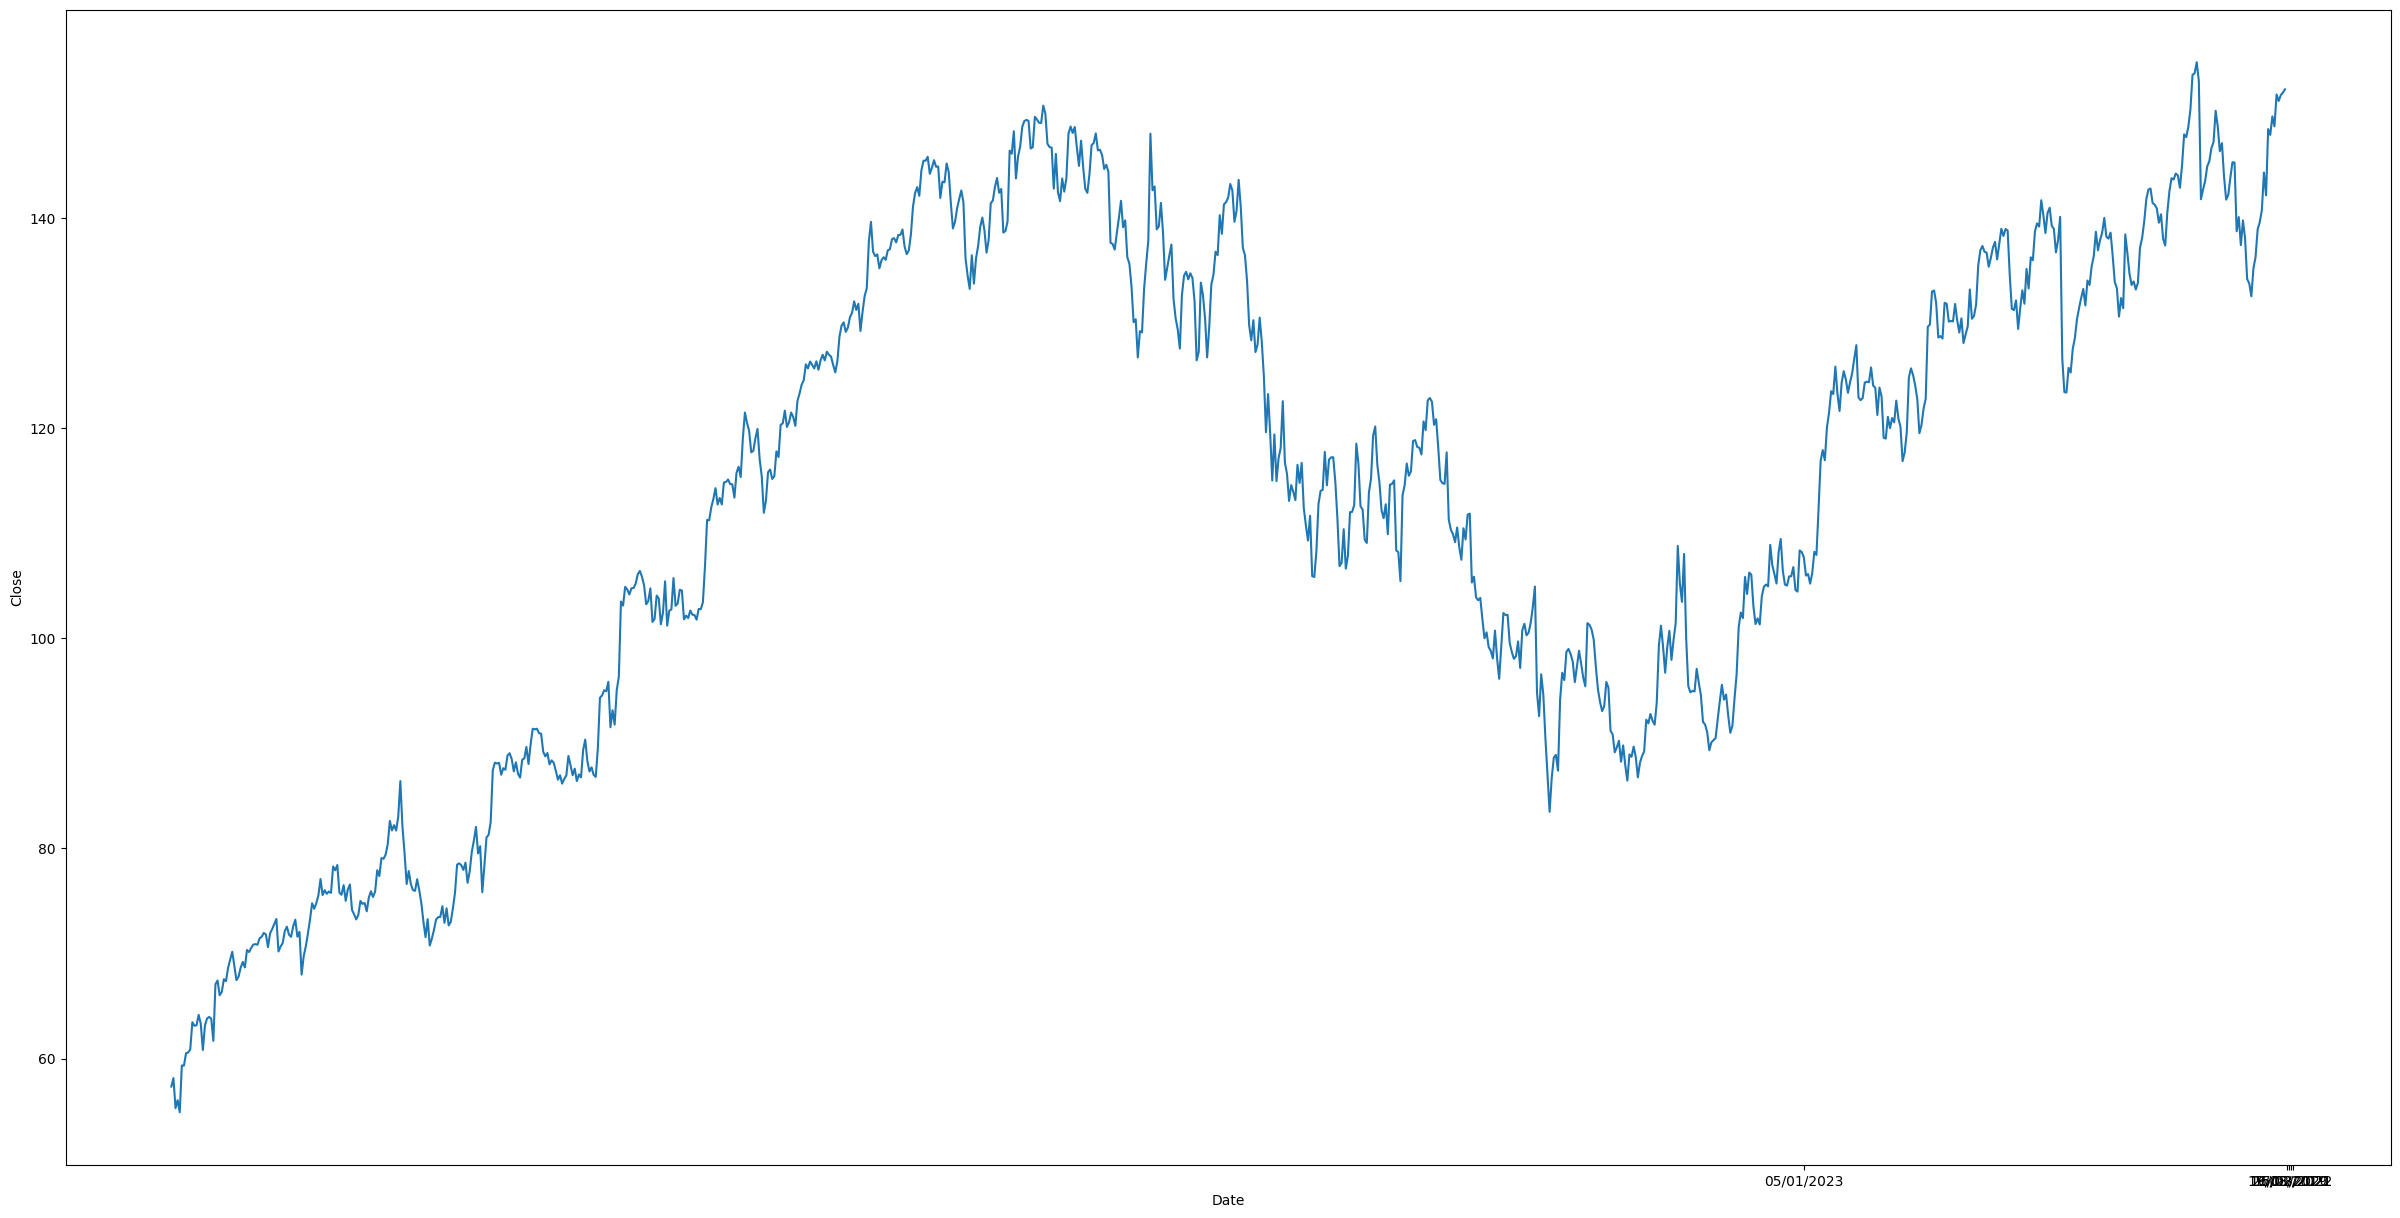

In [25]:
data=df.copy()
plt.figure(figsize=(30,15))
ax=sns.lineplot(x=data.index,y=data['Close'])
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.show()

In [26]:
ma_day = [30, 60, 120,150]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Close'].rolling(ma).mean()

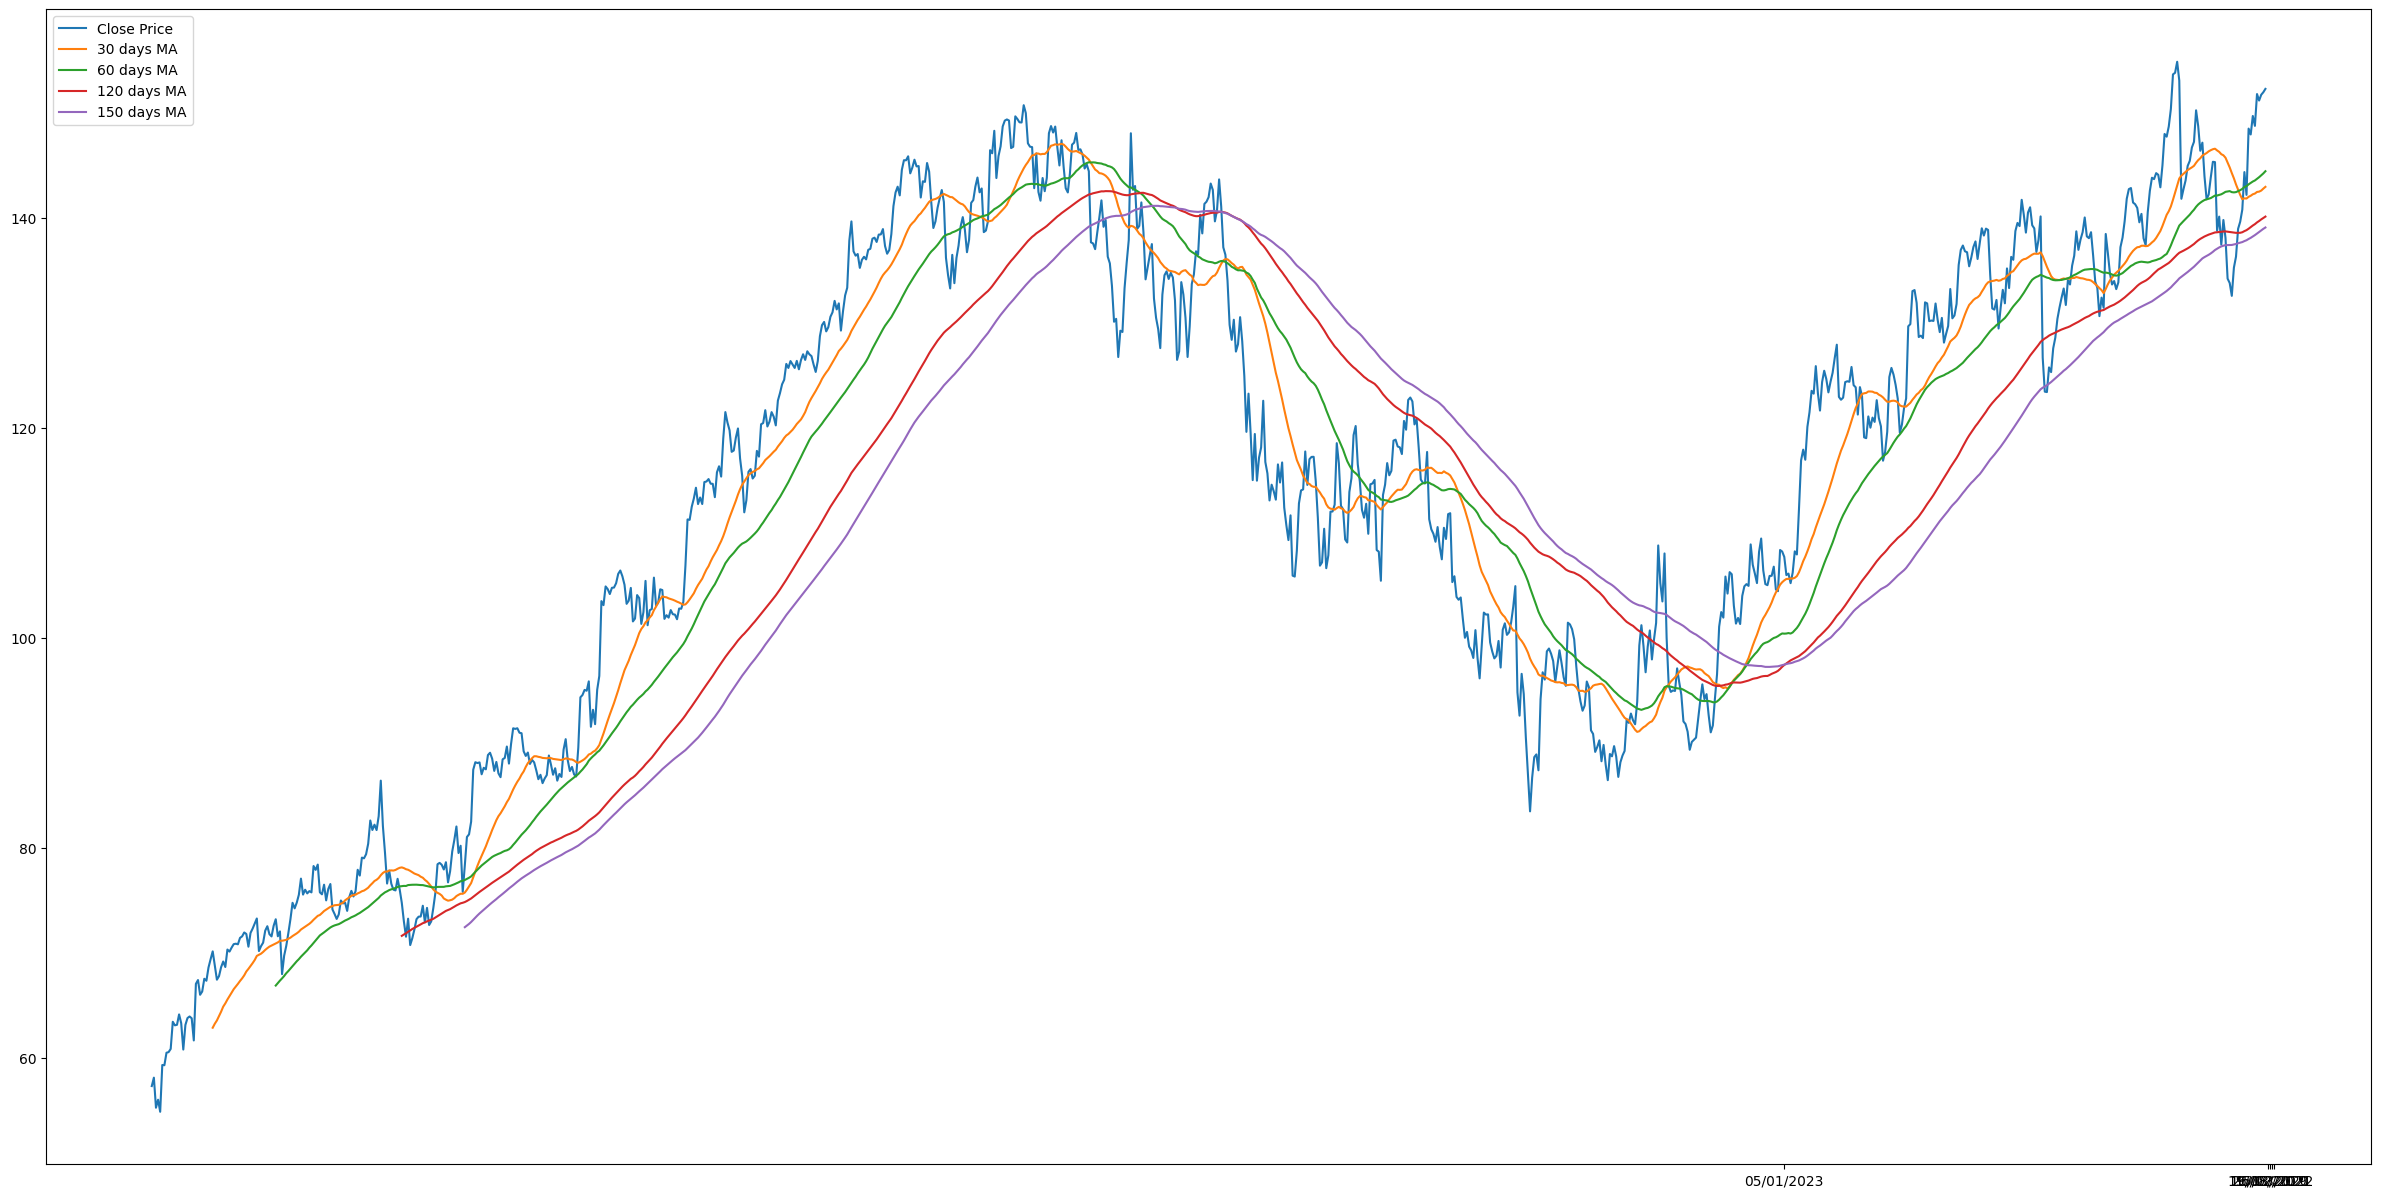

In [27]:
plt.figure(figsize=(30,15))
plt.plot(data['Close'],label='Close Price')
plt.plot(data['MA for 30 days'],label='30 days MA')
plt.plot(data['MA for 60 days'],label='60 days MA')
plt.plot(data['MA for 120 days'],label='120 days MA')
plt.plot(data['MA for 150 days'],label='150 days MA')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [28]:
# Creating a new dataframe with only 'Close'
new_df = data['Close']
new_df.index = data.index

final_df=new_df.values

train_data=final_df[0:646,]
test_data=final_df[646:,]

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['Close'] = train_data
train_df.index = new_df[0:646].index
test_df['Close'] = test_data
test_df.index = new_df[646:].index

In [29]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_df.reshape(-1,1))

X_train_data,y_train_data=[],[]

for i in range(60,len(train_df)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)

X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))

In [30]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [31]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train_data, y_train_data, epochs = 150, batch_size = 32);

Epoch 1/150
19/19 [==============================] - 8s 48ms/step - loss: 0.0893
Epoch 2/150
19/19 [==============================] - 1s 47ms/step - loss: 0.0125
Epoch 3/150
19/19 [==============================] - 1s 48ms/step - loss: 0.0088
Epoch 4/150
19/19 [==============================] - 1s 49ms/step - loss: 0.0074
Epoch 5/150
19/19 [==============================] - 1s 48ms/step - loss: 0.0075
Epoch 6/150
19/19 [==============================] - 1s 50ms/step - loss: 0.0079
Epoch 7/150
19/19 [==============================] - 1s 50ms/step - loss: 0.0070
Epoch 8/150
19/19 [==============================] - 1s 51ms/step - loss: 0.0076
Epoch 9/150
19/19 [==============================] - 1s 45ms/step - loss: 0.0065
Epoch 10/150
19/19 [==============================] - 1s 49ms/step - loss: 0.0070
Epoch 11/150
19/19 [==============================] - 1s 50ms/step - loss: 0.0063
Epoch 12/150
19/19 [==============================] - 1s 49ms/step - loss: 0.0062
Epoch 13/150
19/19 [=====

In [37]:
input_data=new_df[len(new_df)-len(test_df)-60:].values
input_data=input_data.reshape(-1,1)
input_data=scaler.transform(input_data)

In [38]:
X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [39]:
predicted=model.predict(X_test)
predicted=scaler.inverse_transform(predicted)

12/12 [==============================] - 0s 16ms/step


In [40]:
test_df['Predictions']=predicted

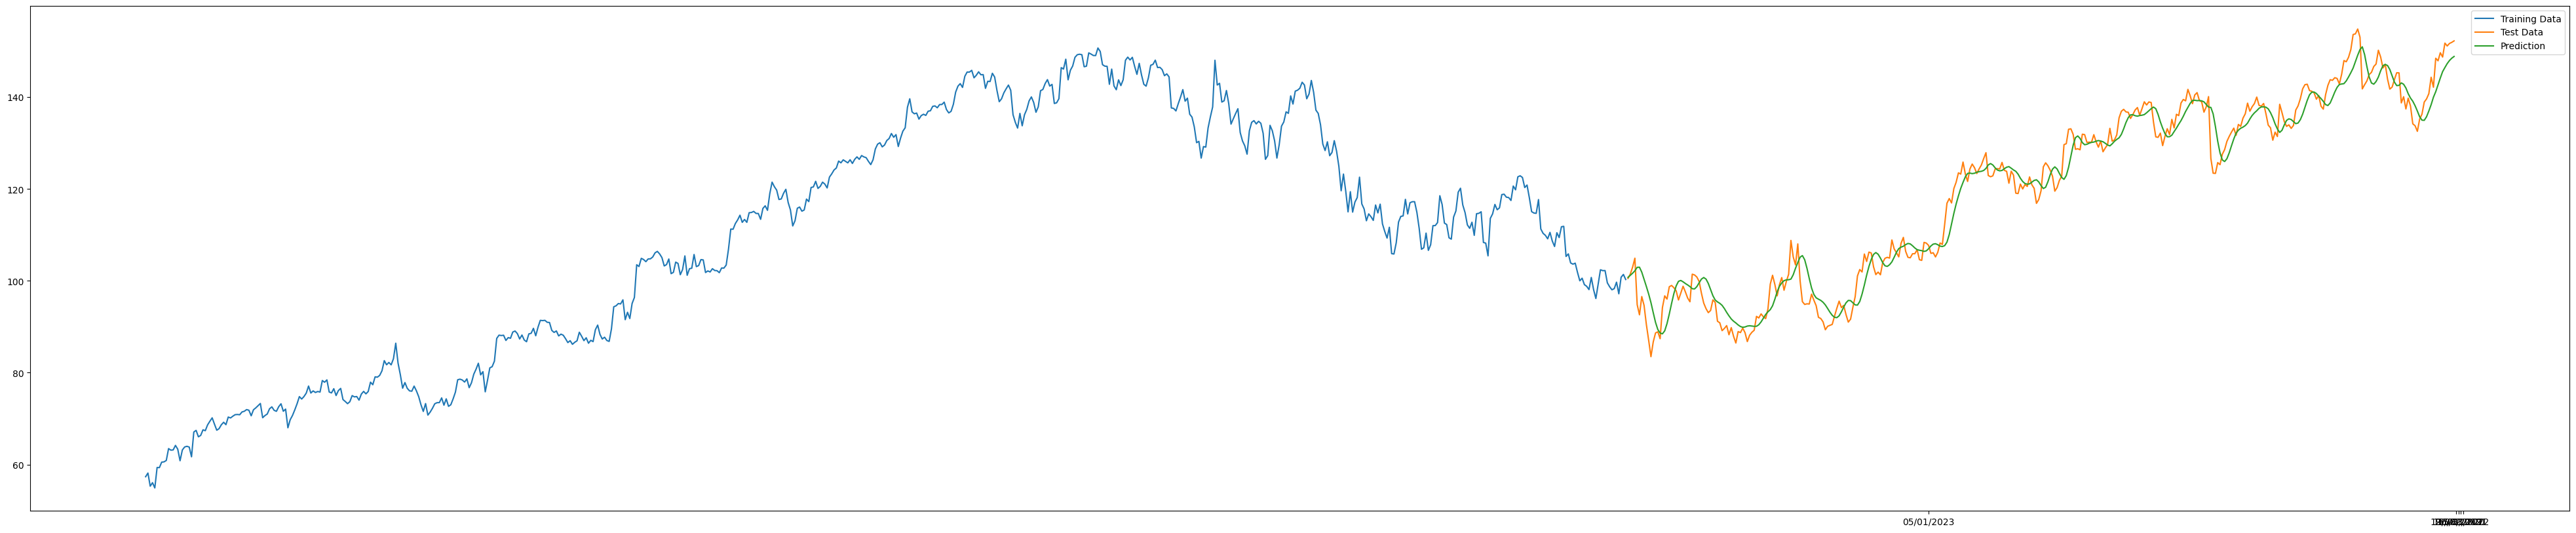

In [41]:
plt.figure(figsize=(50,10))
plt.plot(train_df['Close'],label='Training Data')
plt.plot(test_df['Close'],label='Test Data')
plt.plot(test_df['Predictions'],label='Prediction')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [42]:
new_df[-1]

152.259995

In [43]:
recent_data = new_df[-60:].values  # Assuming new_df contains the entire historical data
scaled_recent_data = scaler.transform(recent_data.reshape(-1, 1))

# Reshape and format the input data
X_future = scaled_recent_data.reshape((1, 60, 1))

# Make the prediction
predicted_price = model.predict(X_future)

# Inverse scale the prediction
predicted_price = scaler.inverse_transform(predicted_price)

print("Predicted price for 1st April 2024:", predicted_price[0][0])

1/1 [==============================] - 0s 25ms/step
Predicted price for 1st April 2024: 149.16525


In [44]:
new_df

Date
03/30/2020     57.341000
03/31/2020     58.140499
04/01/2020     55.280998
04/02/2020     56.042000
04/03/2020     54.894001
                 ...    
03/22/2024    151.770004
03/25/2024    151.149994
03/26/2024    151.699997
03/27/2024    151.940002
03/28/2024    152.259995
Name: Close, Length: 1007, dtype: float64

In [45]:
new_df = pd.concat([new_df, pd.Series(predicted_price[0][0], index=[pd.Timestamp(f'2024-04-01')])])

In [46]:
import pandas as pd
predicted_prices = []

# Iterate over each day from 1st April to 30th April
for day in range(2, 31):
    # Prepare input data for the current day
    start_index = len(new_df) - 60  # Start index of the last 60 days
    end_index = len(new_df)  # End index is exclusive
    input_data = new_df.iloc[start_index:end_index].values.reshape(-1, 1)
    scaled_input_data = scaler.transform(input_data)
    X_day = scaled_input_data.reshape((1, 60, 1))
    
    # Predict the price for the current day
    predicted_price = model.predict(X_day)
    predicted_price = scaler.inverse_transform(predicted_price)
    
    # Append the predicted price to the list
    predicted_prices.append(predicted_price[0][0])
    
    # Create a new Series with the predicted price and concatenate it with the original Series
    new_df = pd.concat([new_df, pd.Series(predicted_price[0][0], index=[pd.Timestamp(f'2024-04-{day}')])])

# Convert the Series to a DataFrame
df = new_df.to_frame(name='Close')

# Display the DataFrame with predicted prices for April
print(df.head())


1/1 [==============================] - 0s 20ms/step
                Close
03/30/2020  57.341000
03/31/2020  58.140499
04/01/2020  55.280998
04/02/2020  56.042000
04/03/2020  54.894001


In [47]:
google_prediction = df[-30:]
type(google_prediction)

pandas.core.frame.DataFrame

In [48]:
google_prediction.to_csv(r"C:\Users\Ritesh\Desktop\TeamSynergy_Codeshastra\results\google_prediction.csv")